In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mp
import sklearn
from IPython.display import Image

%matplotlib inline

# Low Rank Approximation and the SVD

Today, we move on.   

However, let's look back and try to put the modeling we've done into a larger context.

## Models are simplifications

One way of thinking about modeling or clustering is that we are building a __simplification__ of the data. 

That is, a model of the data that is simpler than the data.

In particular, instead of thinking of the data as thousands or millions of individual data points, we think of it in terms of a small number of clusters, or a parametric distribution, etc, etc.

From this simpler description, we hope to gain __insight.__

There is an interesting question here:  __why__ does this process often lead to insight?   

That is, why does it happen so often that a large dataset can be described in terms of a much simpler model?

I don't know.

<center>
    
<img src="figs/L10-William-of-Ockham.png" alt="Figure" width="40%">
    
</center>

By self-created (Moscarlop) - Own work, <a href="http://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=5523066">Link</a>

However, I think that William of Ockham (c. 1300 AD) was on the right track.

He said:

> Non sunt multiplicanda entia sine necessitate

or, in other words:

> Entities must not be multiplied beyond necessity.

by which he meant:

> Among competing hypotheses, the one with the fewest assumptions should be selected.

Which has come to be known as "Occam's razor."

William was saying that it is more common for a set of observations to be determined by a simple process than a complex process.

In other words, the world is full of simple (but often hidden) patterns.

From which one can justify the observation that "modeling works suprisingly often."

## Data Matrices

Now we'll consider a (seemingly) very different approximation of data, applicable to data when it is in matrix form.

$${\mbox{$m$ data objects}}\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{ccccc}
\begin{array}{c}a_{11}\\\vdots\\a_{i1}\\\vdots\\a_{m1}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}a_{1j}\\\vdots\\a_{ij}\\\vdots\\a_{mj}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}a_{1n}\\\vdots\\a_{in}\\\vdots\\a_{mn}\end{array}
\end{array}\right]}^{\mbox{$n$ features}}$$

<table>
<tr><th>Data Type</th><th>Rows</th><th>Columns</th><th>Elements</th></tr>
<tr><td>Network Traffic<td>Sources</td><td>Destinations</td><td>Number of Bytes</td></tr>
<tr><td>Social Media</td><td>Users</td><td>time bins</td><td>Number of Posts/Tweets/Likes</td></tr>
<tr><td>Web Browsing</td><td>Users</td><td>Content Categories</td><td>Visit Counts/Bytes Downloaded</td></tr>
<tr><td>Web Browsing</td><td>Users</td><td>time bins</td><td>Visit Counts/Bytes Downloaded</td></tr>
</table>

## Matrix Rank

Let's briefly review some definitions.

We'll consider an $m\times n$ real matrix $A$.

The __rank__ of $A$ is the __dimension of its column space.__   

The dimension of a space is the smallest number of (linearly independent) vectors needed to span the space.

So the dimension of the column space of $A$ is the __smallest number of vectors that suffice to construct the columns of $A$.__

Then the rank of $A$ is the size of the smallest set $\{\mathbf{u}_1, \mathbf{u}_2, \dots, \mathbf{u}_p\}$ such that every column $\mathbf{a}_i$ can be expressed as:

$$\mathbf{a}_i = c_{i1}\mathbf{u}_1 + c_{i2}\mathbf{u}_2 + \dots + c_{ip}\mathbf{u}_p\;\;\;\;i=1,\dots,n.$$

The largest value that a matrix rank can take is $\min(m,n)$.

However it can happen that the rank of a matrix is __less__ than $\min(m,n)$.

Now to store a matrix $A \in \mathbb{R}^{m\times n}$ we need to store $m n$ values.

However, if $A$ has rank $k$, it can be factored as $A = UV$,

where $U \in \mathbb{R}^{m\times k}$ and $V \in \mathbb{R}^{k \times n}$.

This only requires $k(m+n)$ values, which could be much smaller than $mn$.

$$ \mbox{$m$ data objects}\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{ccccc}
\begin{array}{c}a_{11}\\\vdots\\a_{i1}\\\vdots\\a_{m1}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}a_{1j}\\\vdots\\a_{ij}\\\vdots\\a_{mj}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}a_{1n}\\\vdots\\a_{in}\\\vdots\\a_{mn}\end{array}
\end{array}\right]}^\mbox{$n$ features} =
\overbrace{\left[\begin{array}{cc}\vdots&\vdots\\\vdots&\vdots\\\mathbf{u}_1&\mathbf{u}_k\\\vdots&\vdots\\\vdots&\vdots\end{array}\right]}^{\large k}
\times
\left[\begin{array}{ccccc}\dots&\dots&\mathbf{v}_1&\dots&\dots\\\dots&\dots&\mathbf{v}_k&\dots&\dots\end{array}\right]$$

## Low Effective Rank

In many situations we may wish to __approximate__ a data matrix $A$ with a low-rank matrix $A^{(k)}.$

To talk about when one matrix "approximates" another, we need a norm for matrices.  

We will use the __Frobenius norm__ which is just the usual $\ell_2$ norm, treating the matrix as a vector.

The definition of the Frobenius norm of $A$, denoted $\Vert A\Vert_F$, is:

$$\Vert A\Vert_F = \sqrt{\sum a_{ij}^2}.$$

To quantify when one matrix is "close" to another, we use distance in Euclidean space:

$$\mbox{dist}(A,B) = \Vert A-B\Vert_F.$$

(where the Euclidean space is the $mn$-dimensional space of $m\times n$ matrices.)

Now we can define the __rank-$k$ approximation__ to $A$:

When $k < \operatorname{Rank} A$, the rank-$k$ approximation to $A$ is the closest rank-$k$ matrix to $A$, i.e., 

$$A^{(k)} =\arg \min_{\{B\;|\;\operatorname{Rank} B = k\}} \Vert A-B\Vert_F.$$

This can also be considered the best rank-$k$ approximation to $A$ in a least-squares sense.

Let's say we have $A^{(k)}$, a rank-$k$ approximation to $A$.  

By definition, there is a set $\mathcal{U}$ consisting of $k$ vectors such that each column of $A^{(k)}$ can be expressed as a linear combination of vectors in $\mathcal{U}$.   

Let us  call the matrix formed by those vectors $U$.

So 

$$A^{(k)} = UV^T$$

for some set of coefficients $V^T$ that describe the linear combinations of $U$ that yield the columns of $A^{(k)}$. 

So $U$ is $m\times k$ and $V$ is $n\times k$.

If we approximate $A$ by $A^{(k)}$, then the error we incur is:

$$\Vert A-A^{(k)}\Vert_F.$$

Hence, a rank-$k$ approximation $A^{(k)}$ is valuable if 

* $\Vert A-A^{(k)}\Vert_F$ is small compared to $\Vert A\Vert_F$, and 
* $k$ is small compared to $m$ and $n$.

In that case we have achieved a simplification of the data without a great loss in accuracy.

## Finding Rank-$k$ Approximations

There is a celebrated method for finding the best rank-$k$ approximation to any matrix: the __Singular Value Decomposition (SVD).__

> SVD is "the Rolls-Royce and the Swiss Army Knife of Numerical Linear Algebra.”

Dianne O’Leary, MMDS ’06

The singular value decomposition of a rank-$r$ matrix $A$ has the form:

$$A = U\Sigma V^T$$

where 

1. $U$ is $m\times r$
2. The columns of $U$ are mutually orthogonal and unit length, ie., $U^TU = I$.
3. $V$ is $n\times r$.
4. The columns of $V$ are mutually orthogonal and unit length, ie., $V^TV = I$.
5. The matrix $\Sigma$ is an $r\times r$ diagonal matrix, whose diagonal values are $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > 0$.

    
$$ \left[\begin{array}{cccc}\begin{array}{c}\vdots\\\vdots\\{\bf a_1}\\\vdots\\\vdots\end{array}&\begin{array}{c}\vdots\\\vdots\\{\bf a_2}\\\vdots\\\vdots\end{array}&\dots&\begin{array}{c}\vdots\\\vdots\\{\bf a_n}\\\vdots\\\vdots\end{array}\\\end{array}\right] =
\overbrace{\left[\begin{array}{cc}\vdots&\vdots\\\vdots&\vdots\\\mathbf{u}_1&\mathbf{u}_r\\\vdots&\vdots\\\vdots&\vdots\end{array}\right]}^{\large r}
\times
\left[\begin{array}{cc}\sigma_1&~\\~&\sigma_r\\\end{array}\right]
\times
\left[\begin{array}{ccccc}\dots&\dots&\mathbf{v}_1&\dots&\dots\\\dots&\dots&\mathbf{v}_r&\dots&\dots\end{array}\right]$$

Npw, the SVD is _incredibly useful_ for finding matrix approximations.

In particular, for an $m\times n$ matrix $A$, the SVD does two things:

1. It gives the best rank-$k$ approximation to $A$ for __every__ $k$ up to the rank of $A$.
2. It gives the __distance__ of the best approximation $A^{(k)}$ from $A$ for each $k$.

In terms of the singular value decomposition, 

The best rank-$k$ approximation to $A$ is formed by taking 

   * $U' = $ the $k$ leftmost columns of $U$, 
   * $\Sigma' = $ the $k\times k$ upper left submatrix of $\Sigma$, and 
   * $V'= $ the $k$ leftmost columns of $V$, and constructing 

$$ A^{(k)} = U'\Sigma'(V')^T.$$



Furthermore, the distance (in Frobenius norm) of the best rank-$k$ approximation $A^{(k)}$ from $A$ is equal to $\sqrt{\sum_{i=k+1}^r\sigma^2_i}$.

That is, if you construct $A^{(k)}$ as shown above, then:

$$\Vert A-A^{(k)}\Vert_F^2 = \sum_{i=k+1}^r\sigma^2_i$$

## Low Effective Rank

Almost any data matrix $A$ that one encounters will usually be __full rank__,

meaning that $\operatorname{Rank} A = \min(m, n)$.

However, it is often the case that data matrices have __low effective rank.__

By this we mean that one can usefully approximate $A$ by some $A^{(k)}$ for which $k \ll \min(m,n)$.

For any data matrix, we can judge when this is the case by looking at its singular values, because the singular values tell us the distance to the nearest rank-$k$ matrix.

## Empirical Evidence

Let's see how this theory can be used in practice, and investigate some real data.

We'll look at data traffic on the Abilene network:

<img src='figs/L10-Abilene-map.png'>

Source: Internet2, circa 2005

In [2]:
with open('data/net-traffic/AbileneFlows/odnames','r') as f:
    odnames = [line.strip() for line in f]
dates = pd.date_range('9/1/2003', freq = '10min', periods = 1008)
Atraf = pd.read_table('data/net-traffic/AbileneFlows/X', sep='  ', header=None, names=odnames, engine='python')
Atraf.index = dates
Atraf

,ATLA-ATLA,ATLA-CHIN,ATLA-DNVR,ATLA-HSTN,ATLA-IPLS,ATLA-KSCY,ATLA-LOSA,ATLA-NYCM,ATLA-SNVA,ATLA-STTL,...,WASH-CHIN,WASH-DNVR,WASH-HSTN,WASH-IPLS,WASH-KSCY,WASH-LOSA,WASH-NYCM,WASH-SNVA,WASH-STTL,WASH-WASH
2003-09-01 00:00:00,8466132.0,29346537.0,15792104.0,3646187.0,21756443.0,10792818.0,14220940.0,25014340.0,13677284.0,10591345.0,...,53296727.0,18724766.0,12238893.0,52782009.0,12836459.0,31460190.0,105796930.0,13756184.0,13582945.0,120384980.0
2003-09-01 00:10:00,20524567.0,28726106.0,8030109.0,4175817.0,24497174.0,8623734.0,15695839.0,36788680.0,5607086.0,10714795.0,...,68413060.0,28522606.0,11377094.0,60006620.0,12556471.0,32450393.0,70665497.0,13968786.0,16144471.0,135679630.0
2003-09-01 00:20:00,12864863.0,27630217.0,7417228.0,5337471.0,23254392.0,7882377.0,16176022.0,31682355.0,6354657.0,12205515.0,...,67969461.0,37073856.0,15680615.0,61484233.0,16318506.0,33768245.0,71577084.0,13938533.0,14959708.0,126175780.0
2003-09-01 00:30:00,10856263.0,32243146.0,7136130.0,3695059.0,28747761.0,9102603.0,16200072.0,27472465.0,9402609.0,10934084.0,...,66616097.0,43019246.0,12726958.0,64027333.0,16394673.0,33440318.0,79682647.0,16212806.0,16425845.0,112891500.0
2003-09-01 00:40:00,10068533.0,30164311.0,8061482.0,2922271.0,35642229.0,9104036.0,12279530.0,29171205.0,7624924.0,11327807.0,...,66797282.0,40408580.0,11733121.0,54541962.0,16769259.0,33927515.0,81480788.0,16757707.0,15158825.0,123140310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-09-07 23:10:00,8849096.0,33461807.0,5866138.0,3786793.0,19097140.0,10561532.0,26092040.0,28640962.0,8343867.0,8820650.0,...,65925313.0,21751316.0,11058944.0,58591021.0,17137907.0,24297674.0,83293655.0,17329425.0,20865535.0,123125390.0
2003-09-07 23:20:00,9776675.0,31474607.0,5874654.0,11277465.0,14314837.0,9106198.0,26412752.0,26168288.0,8638782.0,9193717.0,...,70075490.0,29126443.0,12667321.0,54571764.0,15383038.0,25238842.0,70015955.0,16526455.0,16881206.0,142106800.0
2003-09-07 23:30:00,9144621.0,32117262.0,5762691.0,7154577.0,17771350.0,10149256.0,29501669.0,25998158.0,11343171.0,9423042.0,...,68544458.0,27817836.0,15892668.0,50326213.0,12098328.0,27689197.0,73553203.0,18022288.0,18471915.0,127918530.0
2003-09-07 23:40:00,8802106.0,29932510.0,5279285.0,5950898.0,20222187.0,10636832.0,19613671.0,26124024.0,8732768.0,8217873.0,...,65087776.0,28836922.0,11075541.0,52574692.0,11933512.0,31632344.0,81693475.0,16677568.0,16766967.0,138180630.0


In [3]:
Atraf.shape

(1008, 121)

As we would expect, our traffic matrix has rank 121:

In [4]:
np.linalg.matrix_rank(Atraf)

121

However -- perhaps it has low __effective__ rank.

The `numpy` routine for computing SVD is `np.linalg.svd`:

In [5]:
u, s, vt = np.linalg.svd(Atraf)

Now let's look at the singular values of `Atraf` to see if it can be usefully approximated as a low-rank matrix:

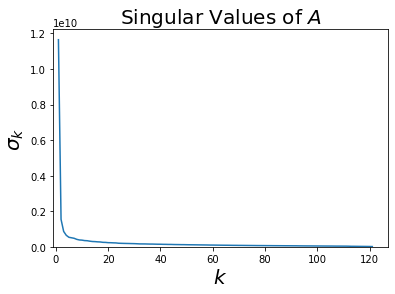

In [6]:
fig = plt.figure(figsize=(6,4))
plt.plot(range(1,1+len(s)),s)
plt.xlabel(r'$k$',size=20)
plt.ylabel(r'$\sigma_k$',size=20)
plt.ylim(ymin = 0)
plt.xlim(xmin = -1)
plt.title(r'Singular Values of $A$',size=20);

This classic, sharp-elbow tells us that a few singular values are very large, and most singular values are quite small.

Zooming in for just small $k$ values, we can see that the elbow is around 4 - 6 singular values:

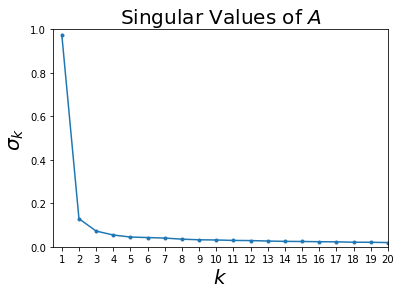

In [7]:
fig = plt.figure(figsize = (6, 4))
Anorm = np.linalg.norm(Atraf)
plt.plot(range(1, 21), s[0:20]/Anorm, '.-')
plt.xlim([0.5, 20])
plt.ylim([0, 1])
plt.xlabel(r'$k$', size=20)
plt.xticks(range(1, 21))
plt.ylabel(r'$\sigma_k$', size=20);
plt.title(r'Singular Values of $A$',size=20);

This pattern of singular values suggests __low effective rank.__

Let's use the formula above to compute the relative error of a rank-$k$ approximation to $A$:

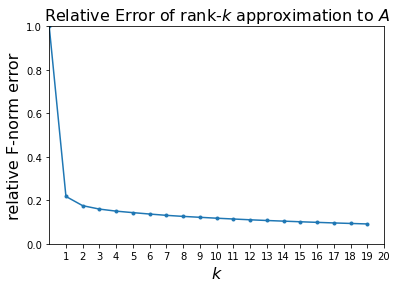

In [8]:
fig = plt.figure(figsize = (6, 4))
Anorm = np.linalg.norm(Atraf)
err = np.cumsum(s[::-1]**2)
err = np.sqrt(err[::-1])
plt.plot(range(0, 20), err[:20]/Anorm, '.-')
plt.xlim([0, 20])
plt.ylim([0, 1])
plt.xticks(range(1, 21))
plt.xlabel(r'$k$', size = 16)
plt.ylabel(r'relative F-norm error', size=16)
plt.title(r'Relative Error of rank-$k$ approximation to $A$', size=16);

Remarkably, we are down to 9% relative error using only a rank 20 approximation to $A$.

So instead of storing 

* $mn =$ (1008 $\cdot$ 121) = 121,968 values, 

we only need to store 

* $k(m+n)$ = 20 $\cdot$ (1008 + 121) = 22,580 values, 

which is a 81% reduction in size.

## Low Effective Rank is Common

In practice __many__ datasets have low effective rank.   

Here are some more examples.

__Likes on Facebook.__

Here, the matrices are 

1. Number of likes:  Timebins $\times$ Users
2. Number of likes:  Users $\times$ Page Categories
3. Entropy of likes across categories:  Timebins $\times$ Users

<center>
<img width=650, src = figs/L10-facebook.png/>
</center>

Source: [Viswanath et al., Usenix Security, 2014]

__Social Media Activity.__

Here, the matrices are 

1. Number of Yelp reviews:  Timebins $\times$ Users
2. Number of Yelp reviews:  Users $\times$ Yelp Categories
3. Number of Tweets:  Users $\times$ Topic Categories

<center>
<img width=650, src = figs/L10-yelp-twitter.png/>
</center>

Source: [Viswanath et al., Usenix Security, 2014]

__User preferences over items.__

Example: the Netflix prize worked with partially-observed matrices like this:

$$\left[\begin{array}{ccccccc}
  ~&~&~&\vdots&~&~&~\\
  &~&3&2&~&1&\\
  &1&~&1&~&~&\\
  \dots&~&2&~&4&~&\dots\\
  &5&5&~&4&~&\\
  &1&~&~&1&5&\\
  ~&~&~&\vdots&~&~&~\\
\end{array}
\right]
$$

Where the rows correspond to users, the columns to movies, and the entries are ratings.

Although the problem matrix was of size 500,000 $\times$ 18,000, the winning approach modeled the matrix as having __rank 20 to 40.__

Source: [Koren et al, IEEE Computer, 2009]

__Images.__

Image data often shows low effective rank.

For example, here is an original photo:

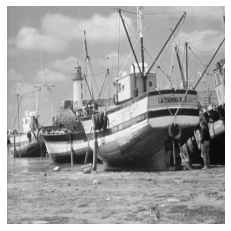

In [9]:
boat = np.loadtxt('data/images/boat/boat.dat')
import matplotlib.cm as cm
plt.figure()
plt.imshow(boat,cmap = cm.Greys_r)
plt.axis('off');

Let's look at its spectrum:

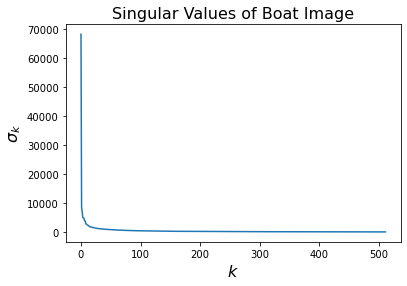

In [10]:
u, s, vt = np.linalg.svd(boat, full_matrices = False)
plt.plot(s)
plt.xlabel('$k$', size = 16)
plt.ylabel(r'$\sigma_k$', size = 16)
plt.title('Singular Values of Boat Image', size = 16);

This image is 512 $\times$ 512.  As a matrix, it has rank of 512.   

But its _effective_ rank is low.

Based on the plot above, its effective rank is perhaps 40.

Let's find the closest rank-40 matrix and view it.

In [11]:
u, s, vt = np.linalg.svd(boat, full_matrices = False)
s[40:] = 0
boatApprox = u @ np.diag(s) @ vt

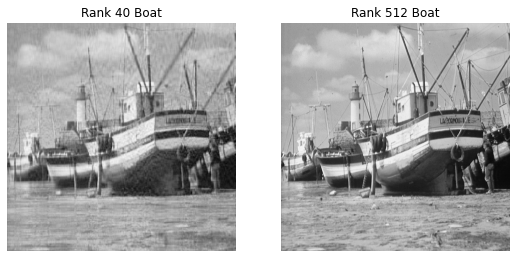

In [12]:
#
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boatApprox,cmap = cm.Greys_r)
plt.axis('off')
plt.title('Rank 40 Boat')
plt.subplot(1,2,2)
plt.imshow(boat,cmap = cm.Greys_r)
plt.axis('off')
plt.title('Rank 512 Boat');
# plt.subplots_adjust(wspace=0.5)

## Interpretations of Low Effective Rank

How can we understand the low-effective-rank phenomenon in general?

There are two helpful interpretations:

1. Common Patterns
2. Latent Factors

### Low Rank Implies Common Patterns

The first interpretation of low-rank behavior is in answering the question:

"What is the strongest pattern in the data?"

Using the SVD we form the low-rank approximation as

   * $U' = $ the $k$ leftmost columns of $U$, 
   * $\Sigma' = $ the $k\times k$ upper left submatrix of $\Sigma$, and 
   * $V'= $ the $k$ leftmost columns of $V$, and constructing 
   
with $$ A \approx U'\Sigma'(V')^T $$

In this interpretation, we think of each column of $A$ as a combination of the columns of $U'$.

How can this be helpful? 

Consider the set of traffic traces.   There are clearly some common patterns.  How can we find them?

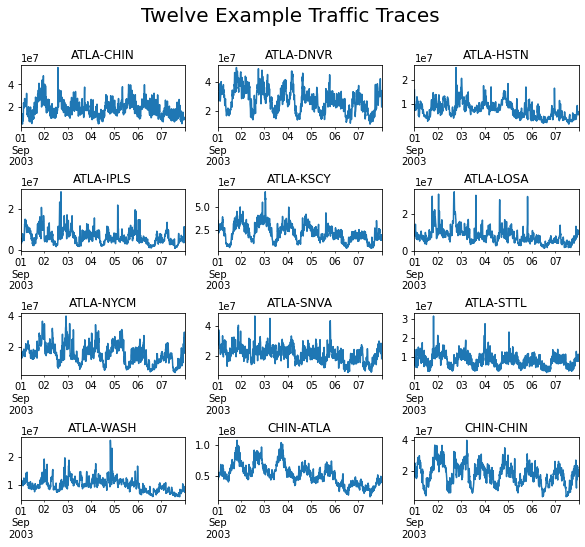

In [13]:
with open('data/net-traffic/AbileneFlows/odnames','r') as f:
    odnames = [line.strip() for line in f]
dates = pd.date_range('9/1/2003',freq='10min',periods=1008)
Atraf = pd.read_table('data/net-traffic/AbileneFlows/X',sep='  ',header=None,names=odnames,engine='python')
Atraf.index = dates
plt.figure(figsize=(10,8))
for i in range(1,13):
    ax = plt.subplot(4,3,i)
    Atraf.iloc[:,i-1].plot()
    plt.title(odnames[i])
plt.subplots_adjust(hspace=1)
plt.suptitle('Twelve Example Traffic Traces', size=20);

Let's use as our example $\mathbf{a}_1,$ the first column of $A$.

This happens to be the ATLA-CHIN flow.

The equation above tells us that

$$\mathbf{a}_1 \approx v_{11}\sigma_1\mathbf{u}_1 + v_{12}\sigma_2\mathbf{u}_2 + \dots + v_{1k}\sigma_k\mathbf{u}_k.$$

In other words, $\mathbf{u}_1$ (the first column of $U$) is the "strongest" pattern occurring in $A$, and its strength is measured by $\sigma_1$.

Here is an view of the first 2 columns of $U\Sigma$ for the traffic matrix data.

These are the strongest patterns occurring across all of the 121 traces.

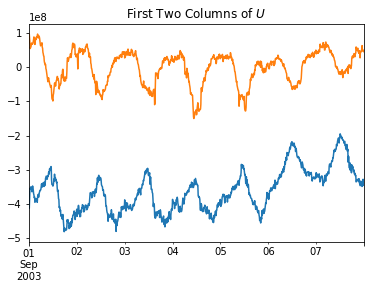

In [14]:
u, s, vt = np.linalg.svd(Atraf, full_matrices = False)
uframe = pd.DataFrame(u @ np.diag(s), index=pd.date_range('9/1/2003', freq = '10min', periods = 1008))
uframe[0].plot()
uframe[1].plot()
plt.title('First Two Columns of $U$');

### Low Rank Defines Latent Factors

The next interpretation of low-rank behavior is that it exposes "latent factors" that describe the data.

Returning to the low-rank decomposition:

$$ A \approx U'\Sigma'(V')^T $$

In this interpretation, we think of each element of $A$ as the inner product of a row of $U'\Sigma'$ and a row of $V'$.

Let's say we are working with a matrix of users and items.

In particular, let the items be movies and matrix entries be ratings, as in the Netflix prize.

Recall the structure from a previous slide:

$$ \mbox{users}\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{cccc}\begin{array}{c}\vdots\\\vdots\\{\bf a_1}\\\vdots\\\vdots\end{array}&\begin{array}{c}\vdots\\\vdots\\{\bf a_2}\\\vdots\\\vdots\end{array}&\dots&\begin{array}{c}\vdots\\\vdots\\{\bf a_n}\\\vdots\\\vdots\end{array}\\\end{array}\right]}^{\mbox{movies}} =
\overbrace{\left[\begin{array}{cc}\vdots&\vdots\\\vdots&\vdots\\\sigma_1\mathbf{u}_1&\sigma_k\mathbf{u}_k\\\vdots&\vdots\\\vdots&\vdots\end{array}\right]}^{\large k}
\times
\left[\begin{array}{ccccc}\dots&\dots&\mathbf{v}_1&\dots&\dots\\\dots&\dots&\mathbf{v}_k&\dots&\dots\end{array}\right]$$

Then the rating that a user gives a movie is the inner product of a $k$ element vector that corresponds to the user, and a $k$ element vector that corresponds to the movie.

In other words:
    
$$ a_{ij} = \mathbf{u}_i^T \mathbf{v}_j$$

We can therefore think of user $i$'s preferences as being captured by $\mathbf{u}_i$, ie., a point in $\mathbb{R}^k$.  

We have described everything we need to know to predict user $i$'s ratings via a $k$-element vector.

The $k$-element vector is called a __latent factor.__

Likewise, we can think of $\mathbf{v}_j$ as a "description" of movie $j$ (another latent factor).

The value in using latent factors comes from the summarization of user preferences, and the predictive power one obtains.

For example, the winning entry in the Netflix prize competition modeled user preferences with a 20-element latent factor.

The remarkable thing is that a person's preferences for all 18,000 movies can be reasonably well captured in a 20-element vector!

Here is a figure from the paper that described the winning strategy in the Netflix prize.

It shows a hypothetical <font color = 'blue'>latent space</font> in which each user, and each movie, is represented by a latent vector.

<center>
    
<img src="figs/L10-Movie-Latent-Space.png" alt="Figure" width="60%">
    
</center>

Source: Koren et al, IEEE Computer, 2009 

In practice, this is perhaps a 20- or 40-dimensional space.

Here are some representations of movies in that space (reduced to 2-D).

Notice how the space seems to capture similarity among movies!

<center>
    
<img src="figs/L10-Netflix-Latent-Factors.png" alt="Figure" width="60%">
    
</center>

Source: Koren et al, IEEE Computer, 2009 

## Summary

* When we are working with data matrices, it is valuable to consider the __effective rank__
* Many (many) datasets in real life show __low effective rank__.
* This property can be explored precisely using the Singular Value Decomposition of the matrix.
* When low effective rank is present,
    * the matrix can be compressed with only small loss of accuracy
    * we can extract the "strongest" patterns in the data
    * we can describe each data item in terms of the inner product of __latent factors.__